# Import Required Libraries
Import the necessary libraries, including TensorFlow, Keras, and other dependencies.

In [1]:
# Import the necessary libraries, including TensorFlow, Keras, and other dependencies
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and Preprocess the MNIST Dataset
Load the MNIST dataset and preprocess the data by normalizing the pixel values and reshaping the input data.

In [2]:
# Load and Preprocess the MNIST Dataset

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the input data to add a channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Print the shape of the datasets to verify
print(f"Training data shape: {train_images.shape}")
print(f"Test data shape: {test_images.shape}")

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


# Build the CNN Model
Define the CNN architecture using Keras, including convolutional layers, pooling layers, and dense layers.

In [3]:
# Build the CNN Model

# Define the CNN architecture using Keras
model = models.Sequential()

# Add the first convolutional layer with 32 filters, a kernel size of 3x3, ReLU activation, and input shape of 28x28x1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a max pooling layer with a pool size of 2x2
model.add(layers.MaxPooling2D((2, 2)))

# Add the second convolutional layer with 64 filters and a kernel size of 3x3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add another max pooling layer with a pool size of 2x2
model.add(layers.MaxPooling2D((2, 2)))

# Add the third convolutional layer with 64 filters and a kernel size of 3x3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output from the convolutional layers
model.add(layers.Flatten())

# Add a dense layer with 64 units and ReLU activation
model.add(layers.Dense(64, activation='relu'))

# Add the output layer with 10 units (one for each class) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Print the model summary to verify the architecture
model.summary()

/Users/young/Documents/IoT-data-analysis-and-application/HW5/HW5_venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the Model
Compile the model with an appropriate optimizer, loss function, and evaluation metrics.

In [4]:
# Compile the Model

# Compile the model with an appropriate optimizer, loss function, and evaluation metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
Train the CNN model on the training data and validate it on the validation data.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8989 - loss: 0.3309 - val_accuracy: 0.9864 - val_loss: 0.0425
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9854 - loss: 0.0473 - val_accuracy: 0.9875 - val_loss: 0.0398
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9906 - loss: 0.0297 - val_accuracy: 0.9892 - val_loss: 0.0335
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9917 - loss: 0.0248 - val_accuracy: 0.9890 - val_loss: 0.0363
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9944 - loss: 0.0187 - val_accuracy: 0.9920 - val_loss: 0.0278
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9955 - loss: 0.0141 - val_accuracy: 0.9910 - val_loss: 0.0308
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9959 - loss: 0.0118 - val_accuracy: 0.9878 - val_loss: 0.0394
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9970 - loss: 0

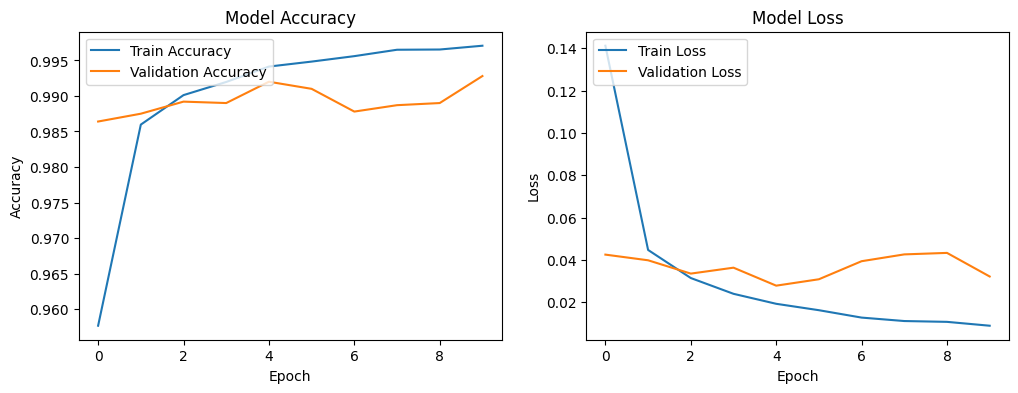

In [5]:
# Train the Model

# Train the CNN model on the training data and validate it on the validation data
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Plot the training and validation accuracy and loss over epochs
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

# Evaluate the Model
Evaluate the trained model on the test data and report the accuracy and other metrics.

313/313 - 1s - 3ms/step - accuracy: 0.9928 - loss: 0.0321
Test accuracy: 0.9928
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



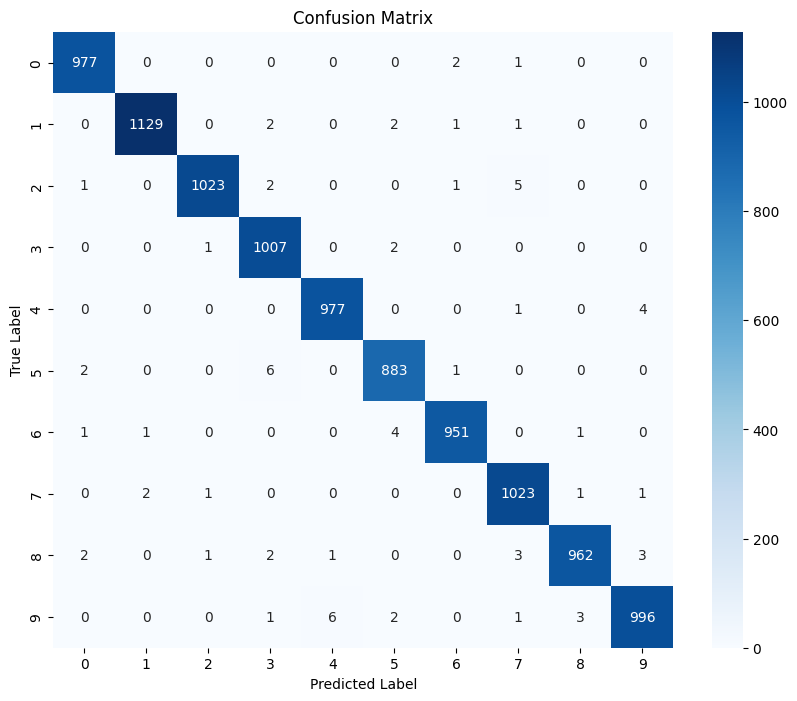

In [7]:
# Evaluate the Model

# Evaluate the trained model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

# Print the test accuracy
print(f'Test accuracy: {test_accuracy:.4f}')

# Generate predictions for the test data
predictions = model.predict(test_images)

# Convert predictions to class labels
predicted_labels = tf.argmax(predictions, axis=1)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(test_labels, predicted_labels, target_names=[str(i) for i in range(10)]))

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Make Predictions
Use the trained model to make predictions on new data and visualize the results.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


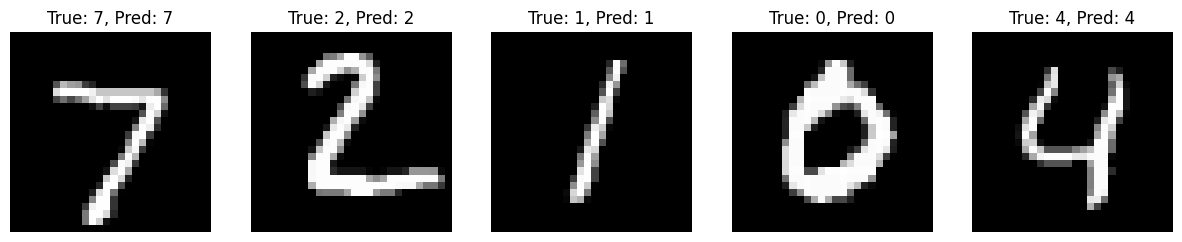

In [8]:
# Make Predictions

# Use the trained model to make predictions on new data and visualize the results

# Select a few test images to visualize
num_images_to_visualize = 5
test_images_to_visualize = test_images[:num_images_to_visualize]
test_labels_to_visualize = test_labels[:num_images_to_visualize]

# Generate predictions for the selected test images
predictions_to_visualize = model.predict(test_images_to_visualize)

# Convert predictions to class labels
predicted_labels_to_visualize = tf.argmax(predictions_to_visualize, axis=1)

# Plot the test images along with their predicted and true labels
plt.figure(figsize=(15, 5))
for i in range(num_images_to_visualize):
    plt.subplot(1, num_images_to_visualize, i + 1)
    plt.imshow(test_images_to_visualize[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {test_labels_to_visualize[i]}, Pred: {predicted_labels_to_visualize[i].numpy()}")
    plt.axis('off')
plt.show()